In [ ]:
import numpy as np
import pandas as pd   
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler , RobustScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.linear_model import LogisticRegression 
from sklearn.neural_network import MLPClassifier 

In [ ]:
ds = pd.read_csv('/content/archive (5).zip')
ds.head  

<bound method NDFrame.head of       male  age  education  ...  heartRate  glucose  TenYearCHD
0        1   39        4.0  ...       80.0     77.0           0
1        0   46        2.0  ...       95.0     76.0           0
2        1   48        1.0  ...       75.0     70.0           0
3        0   61        3.0  ...       65.0    103.0           1
4        0   46        3.0  ...       85.0     85.0           0
...    ...  ...        ...  ...        ...      ...         ...
4233     1   50        1.0  ...       66.0     86.0           1
4234     1   51        3.0  ...       65.0     68.0           0
4235     0   48        2.0  ...       84.0     86.0           0
4236     0   44        1.0  ...       86.0      NaN           0
4237     0   52        2.0  ...       80.0    107.0           0

[4238 rows x 16 columns]>

In [ ]:
ds.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [ ]:
ds.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
ds.shape

(4238, 16)

In [ ]:
X = ds.drop(columns = 'TenYearCHD', axis=1)
print(X)

      male  age  education  currentSmoker  ...  diaBP    BMI  heartRate  glucose
0        1   39        4.0              0  ...   70.0  26.97       80.0     77.0
1        0   46        2.0              0  ...   81.0  28.73       95.0     76.0
2        1   48        1.0              1  ...   80.0  25.34       75.0     70.0
3        0   61        3.0              1  ...   95.0  28.58       65.0    103.0
4        0   46        3.0              1  ...   84.0  23.10       85.0     85.0
...    ...  ...        ...            ...  ...    ...    ...        ...      ...
4233     1   50        1.0              1  ...   92.0  25.97       66.0     86.0
4234     1   51        3.0              1  ...   80.0  19.71       65.0     68.0
4235     0   48        2.0              1  ...   72.0  22.00       84.0     86.0
4236     0   44        1.0              1  ...   87.0  19.16       86.0      NaN
4237     0   52        2.0              0  ...   83.0  21.47       80.0    107.0

[4238 rows x 15 columns]


In [ ]:
{column: len(X[column].unique()) for column in X.columns}

{'BMI': 1364,
 'BPMeds': 3,
 'age': 39,
 'cigsPerDay': 34,
 'currentSmoker': 2,
 'diaBP': 146,
 'diabetes': 2,
 'education': 5,
 'glucose': 144,
 'heartRate': 74,
 'male': 2,
 'prevalentHyp': 2,
 'prevalentStroke': 2,
 'sysBP': 234,
 'totChol': 249}

In [ ]:
ds.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
numeric = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']
eda = ds.loc[: , numeric].copy()

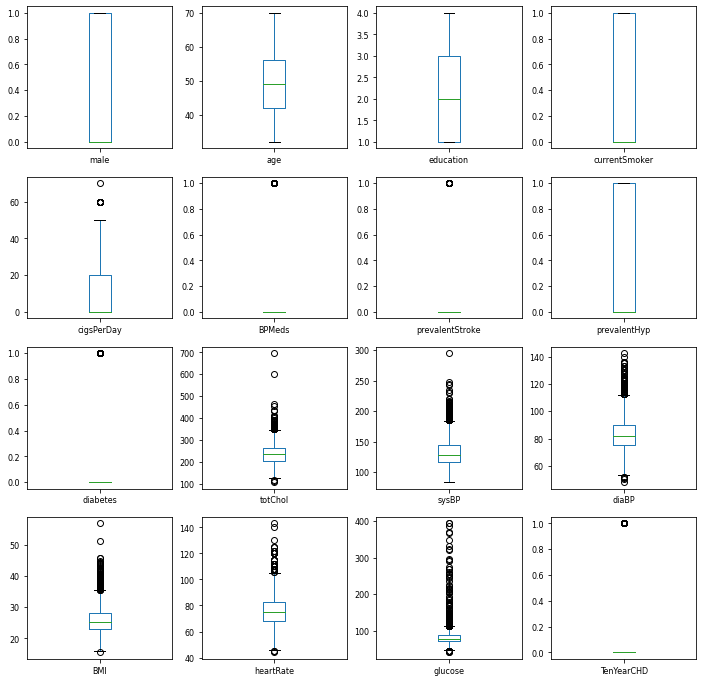

In [ ]:
ds.plot(kind='box' , subplots=True , layout=(4,4) ,fontsize=8 , figsize=(12,12) ) ; 

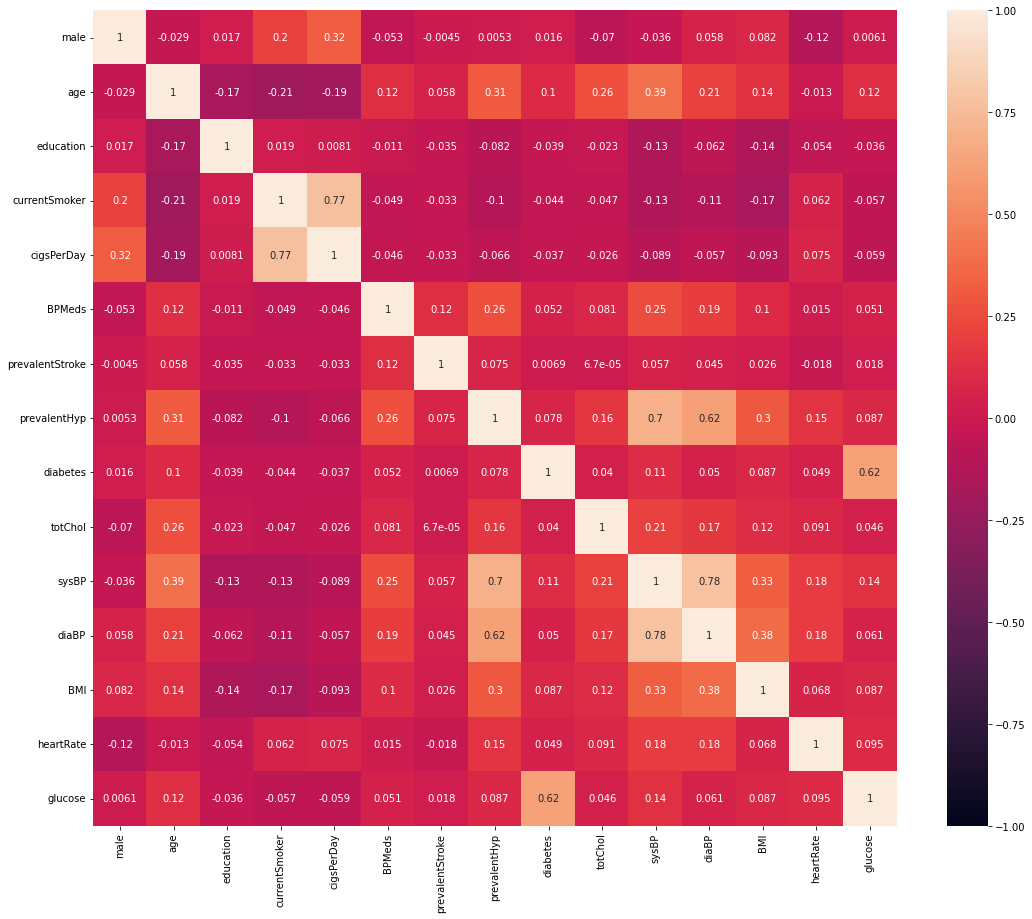

In [ ]:
Y=ds.drop('TenYearCHD', axis=1) .columns
cm=ds[Y].corr()
plt.figure(figsize=(18,15))
sns.heatmap(cm,annot=True, vmin=-1.0 , vmax = 1.0)
plt.show()

In [10]:
ds.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [12]:
ds['TenYearCHD'].value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

In [14]:
ds.shape

(4238, 16)

filling the missing values


In [35]:
ds['education'].fillna(ds['education'].median(),inplace=True)
ds['cigsPerDay'].fillna(ds['cigsPerDay'].median(),inplace=True)
ds['BPMeds'].fillna(ds['BPMeds'].median(),inplace=True)
ds['totChol'].fillna(ds['totChol'].median(),inplace=True)
ds['BMI'].fillna(ds['BMI'].median(),inplace=True)
ds['heartRate'].fillna(ds['heartRate'].median(),inplace=True)
ds['glucose'].fillna(ds['glucose'].median(),inplace=True)


completely filled with meadian value

In [28]:
ds.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [31]:
x=ds.drop(columns='TenYearCHD' , axis=1)
y=ds['TenYearCHD']
print(x)
print(y)

      male  age  education  currentSmoker  ...  diaBP    BMI  heartRate  glucose
0        1   39        4.0              0  ...   70.0  26.97       80.0     77.0
1        0   46        2.0              0  ...   81.0  28.73       95.0     76.0
2        1   48        1.0              1  ...   80.0  25.34       75.0     70.0
3        0   61        3.0              1  ...   95.0  28.58       65.0    103.0
4        0   46        3.0              1  ...   84.0  23.10       85.0     85.0
...    ...  ...        ...            ...  ...    ...    ...        ...      ...
4233     1   50        1.0              1  ...   92.0  25.97       66.0     86.0
4234     1   51        3.0              1  ...   80.0  19.71       65.0     68.0
4235     0   48        2.0              1  ...   72.0  22.00       84.0     86.0
4236     0   44        1.0              1  ...   87.0  19.16       86.0     78.0
4237     0   52        2.0              0  ...   83.0  21.47       80.0    107.0

[4238 rows x 15 columns]
0 

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, stratify=y, random_state=2)

In [20]:
print(x.shape , x_train.shape , x_test.shape)

(4238, 15) (3390, 15) (848, 15)


In [21]:
model = LogisticRegression()

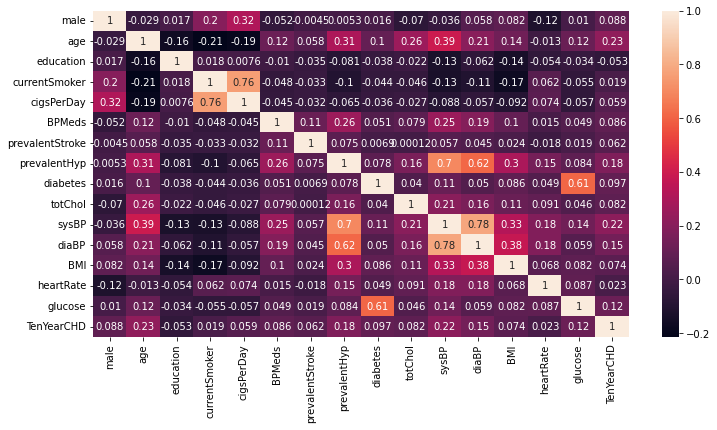

In [34]:
plt.figure(figsize=(12,6))
sns.heatmap(ds.corr(), annot= True)

In [36]:
model.fit(x_train , y_train)

ValueError: ignored

In [37]:
training_data_prediction= model.predict(x_train)

ValueError: ignored

In [38]:
print(training_data_prediction)

NameError: ignored

In [ ]:
score_1 = metrics.r2_score(y_train , training_data_prediction)

score_2 = metrics.mean_absolute_error(y_train, training_data_prediction )

print(score_1)
print(score_2)

In [39]:
test_data_prediction = model.predict(x_test)

ValueError: ignored

In [40]:
plt.scatter(y_train ,training_data_prediction )
plt.xlabel("actual price ")
plt.ylabel("predicted price")
plt.title("actual price vs predicted price")
plt.show()

NameError: ignored